In [28]:
import pandas as pd
import pandas as pd 
import numpy as np
import string
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
df = pd.read_csv("/content/drive/MyDrive/all_data.csv" , lineterminator='\n')

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [32]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ه", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [33]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [34]:
def nospecial(text):
	import re
	text = re.sub("[a-zA-Z0-9]+", "",text)
	return text

In [35]:
def preprocess_text(tweet): 

    #remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    
  
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    tweet = re.sub(p_tashkeel,"", tweet)

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #remove non arabic words
    tweet = nospecial(tweet)

    #trim    
    tweet = tweet.strip()

      #text stemming
    from nltk.stem.isri import ISRIStemmer
    st = ISRIStemmer()
    ISRIStemmer().suf32(tweet)
    
    return tweet

In [36]:
df.tweets = df.tweets.map(preprocess_text)
df.head()

,id,tweets,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون م...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [37]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df["tweets"] = df["tweets"].apply(tokenizer.tokenize)

In [38]:
from nltk.corpus import stopwords
import nltk

In [39]:
nltk.download('stopwords')
stopwords_list = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
from nltk.corpus import stopwords
import nltk

In [41]:
nltk.download('stopwords')
stopwords_list = stopwords.words('arabic')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
df["tweets"]=df["tweets"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [43]:
# # vocabulary of words present in dataset
# data_vocab = []
# for text in df.tweets:
#     for word in text:
#         if word not in data_vocab:
#             data_vocab.append(word)

In [44]:
# len(data_vocab)

In [45]:
df["tweets"]=df["tweets"].apply(lambda x: " ".join(x) )


In [46]:
df.head()

,id,tweets,dialect
0,1175358310087892992,بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحت...,IQ
2,1175450108898565888,مبين كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين الغيبه اخ محمد,IQ


In [47]:
## Load the data to get started
import pandas as pd
import numpy as np
import tensorflow as tf
import spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import keras

In [48]:
max_fatures = 5000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['tweets'].values)
X = tokenizer.texts_to_sequences(df['tweets'].values)
X = pad_sequences(X)

In [49]:
X

array([[   0,    0,    0, ...,    0, 4597, 2068],
       [   0,    0,    0, ...,   11,  756, 3054],
       [   0,    0,    0, ..., 1788,  873, 4125],
       ...,
       [   0,    0,    0, ...,   22,   46,  285],
       [   0,    0,    0, ...,    0,    2,  172],
       [   0,    0,    0, ...,    0,    0, 1271]], dtype=int32)

In [50]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(Dense(18,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 61, 128)           640000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 61, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_2 (Dense)             (None, 64)                12608     
                                                                 
 dense_3 (Dense)             (None, 18)                1170      
                                                                 
Total params: 908,578
Trainable params: 908,578
Non-trainable params: 0
________________________________________________

In [51]:
!pip install pydot graphviz

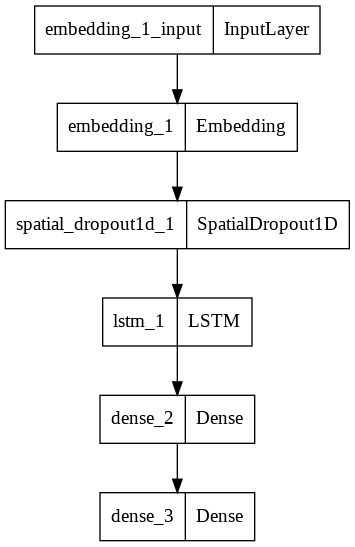

In [52]:
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [53]:
Y = pd.get_dummies(df['dialect']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.02, random_state = 42 , shuffle=True )
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(449033, 61) (449033, 18)
(9164, 61) (9164, 18)


In [ ]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights=True)


history = model.fit(X_train, Y_train, epochs = 15 , validation_split = 0.02 , callbacks=[checkpoint_cb, early_stopping_cb], batch_size = 64)

Epoch 1/15
6876/6876 [==============================] - 3191s 464ms/step - loss: 2.0169 - accuracy: 0.3592 - val_loss: 1.8597 - val_accuracy: 0.4053
Epoch 2/15
6876/6876 [==============================] - 3143s 457ms/step - loss: 1.8373 - accuracy: 0.4171 - val_loss: 1.8051 - val_accuracy: 0.4157
Epoch 3/15
6876/6876 [==============================] - 3172s 461ms/step - loss: 1.7858 - accuracy: 0.4319 - val_loss: 1.7876 - val_accuracy: 0.4273
Epoch 4/15
5294/6876 [======================>.......] - ETA: 12:02 - loss: 1.7521 - accuracy: 0.4429

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Y_pred = model.predict(X_test) 

In [ ]:
classes_x = np.argmax(Y_pred,axis=1)

In [ ]:
classes_x

In [ ]:
Y_pred

In [ ]:
Y_test

In [ ]:
import numpy as np
Y_test_labels=np.argmax(Y_test, axis=1)
Y_test_labels[1]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(classes_x , Y_test_labels )
cm

In [ ]:
print(classification_report(Y_test_labels, classes_x))

In [ ]:
while True :
  pass